# Binaray Classification 

In [2]:
 import tensorflow as tf
 from sklearn.datasets import make_circles
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [3]:
n_samples = 1000
X,Y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
pd.DataFrame(X,Y)

,0,1
1,0.754246,0.231481
1,-0.756159,0.153259
1,-0.815392,0.173282
1,-0.393731,0.692883
0,0.442208,-0.896723
...,...,...
0,0.244054,0.944125
0,-0.978655,-0.272373
1,-0.136900,-0.810012
0,0.670362,-0.767502


## Split The Data

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  random_state=42)
X_train,X_test,Y_train, Y_test = tf.cast(X_train, dtype=tf.float64) ,tf.cast(X_test, dtype=tf.float64),tf.cast(Y_train, dtype=tf.float64), tf.cast(Y_test, dtype=tf.float64)

In [60]:
val_data = {"train": X_test,
            "test": Y_test}
val_data

{'train': <tf.Tensor: shape=(200, 2), dtype=float64, numpy=
 array([[-3.75193021e-01,  6.82659723e-01],
        [ 1.53803467e-02,  9.60026022e-01],
        [-7.02783598e-01, -3.14716993e-01],
        [-2.85250150e-01,  9.66377538e-01],
        [ 4.02416825e-01, -7.43753546e-01],
        [ 6.32279332e-01, -5.71108030e-01],
        [ 8.56066985e-01,  5.49943046e-01],
        [ 1.00335945e+00,  1.90283811e-01],
        [-7.48915033e-01, -2.95112600e-01],
        [ 5.37797049e-02,  9.73883121e-01],
        [-4.70197299e-01,  7.87493733e-01],
        [-2.16863718e-01,  7.24179748e-01],
        [ 9.70258952e-01,  3.66883322e-01],
        [-5.84464292e-01, -5.74147168e-01],
        [-9.11474596e-01, -2.46308219e-01],
        [ 7.68915407e-01, -7.32492505e-02],
        [ 3.84080367e-01,  6.82994365e-01],
        [-6.83641624e-01,  7.14174742e-01],
        [-5.77772743e-01,  5.36516973e-01],
        [-8.32737654e-01,  4.66248342e-01],
        [ 1.24481803e-02,  9.87088374e-01],
        [ 1.0090

## Plot The Data

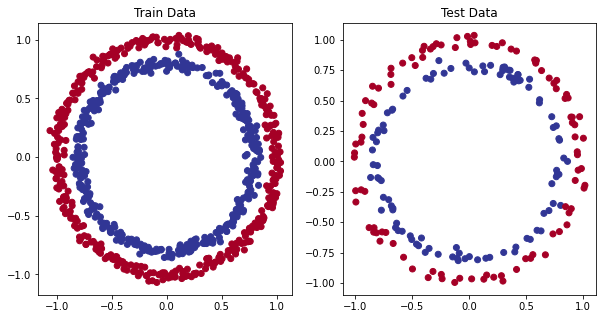

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.RdYlBu)
plt.subplot(1,2,2)
plt.title("Test Data")
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=plt.cm.RdYlBu)


In [6]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## Create The Model

In [70]:
tf.random.set_seed(42)

# create
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['Accuracy'])

#fit
history_0 = model_0.fit(X_train,
                        Y_train,
                        epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.6834 - Accuracy: 0.5462
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6687 - Accuracy: 0.5975
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6402 - Accuracy: 0.6637
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5892 - Accuracy: 0.7925
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5116 - Accuracy: 0.8400
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4281 - Accuracy: 0.9087
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3035 - Accuracy: 0.9812
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1970 - Accuracy: 0.9950
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1285 - Accuracy: 0.9962
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0990 - Accuracy: 0.9950


## Evaluate

In [8]:
model_0.evaluate(X_test, Y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.0073 - Accuracy: 1.0000


[0.007340825162827969, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


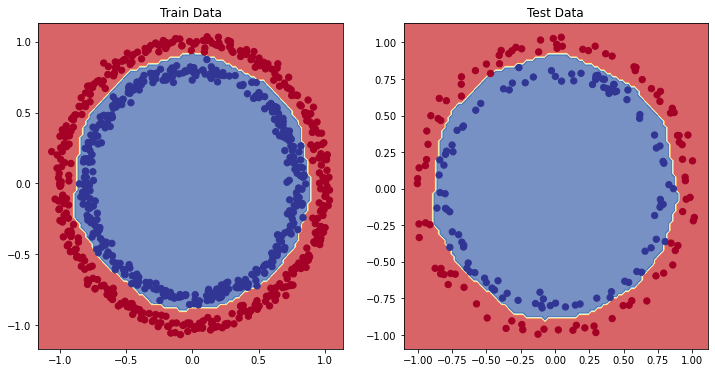

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_0,X_train.numpy(),Y_train.numpy())
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_0,X_test.numpy(),Y_test.numpy())

## Multi class classification

In [53]:
def plot_loss_curves(history):

  loss = np.array(history.history["loss"])
  acc = np.array(history.history["Accuracy"])
  
  
  epochs = np.array(range(len(loss)))
  epochs

  # pd.DataFrame(history.history).plot()

  plt.plot(epochs, loss, label="Loss", c="b"),
  plt.plot(epochs, acc, label="Accuracy", c="y")
  plt.legend()

In [72]:
 epochs = np.array(range(len(history_0.history["loss"])))
 epochs


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

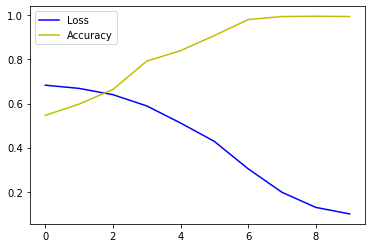

In [73]:
plot_loss_curves(history_0)